In [28]:
f = open("SignificantCpG_pVal1k_allData",'r')
g = f.read()
cpgSites = g.split("\n")
cpgSites = cpgSites[:-1]

In [29]:
import pandas as pd
direc = "C:/Users/chsue/Documents/MITyear3/6.047/GDACLAMLmethyl450/data/"
cpgInfo = pd.read_csv(direc+"HumanMethylation450_15017482_v1-2.csv",skiprows=[0,1,2,3,4,5,6])
importantCpgs = cpgInfo.loc[cpgInfo['IlmnID'].isin(cpgSites)]

C:\Users\chsue\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (2,4,11,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [31]:
importantGenes = importantCpgs.dropna(subset=['UCSC_RefGene_Name'])["UCSC_RefGene_Name"]
print(len(importantCpgs.dropna(subset=['UCSC_RefGene_Name'])))
geneSets = [geneSet.split(";") for geneSet in list(importantGenes)]
importantGenesUniqueList = set()
importantGenesDict = {}
for geneSet in geneSets:
    seen = False
    for gene in geneSet:
        if not seen:
            if gene not in importantGenesDict:
                importantGenesDict[gene] = 0
            importantGenesDict[gene] += 1
            seen = True
        importantGenesUniqueList.add(gene)
importantGenesUniqueList = list(importantGenesUniqueList)
sorted(importantGenesDict.items(), key=lambda kv: kv[1],reverse=True)

703


[('PCDHGA4', 16),
 ('WT1', 9),
 ('PCDHA2', 7),
 ('PRDM8', 6),
 ('ZIC1', 6),
 ('DGKG', 6),
 ('ZIC4', 5),
 ('ZNF876P', 5),
 ('HORMAD2', 5),
 ('DPP6', 5),
 ('C22orf45', 5),
 ('PCDHA6', 5),
 ('MOV10L1', 4),
 ('DNAH1', 4),
 ('LOC254559', 4),
 ('MTNR1B', 4),
 ('CCDC81', 4),
 ('CACNA2D4', 4),
 ('PRHOXNB', 4),
 ('GPR6', 3),
 ('ANKMY1', 3),
 ('ELTD1', 3),
 ('SLC7A14', 3),
 ('CBFA2T3', 3),
 ('PCDHA7', 3),
 ('PCDHA1', 3),
 ('BTBD3', 3),
 ('NKAPL', 3),
 ('MESP2', 3),
 ('CCDC36', 3),
 ('CYP26C1', 3),
 ('DIP2C', 3),
 ('OPA3', 3),
 ('CD164L2', 3),
 ('RSPH10B', 3),
 ('ZFPM1', 3),
 ('CCDC85C', 3),
 ('PSKH2', 3),
 ('PRLHR', 3),
 ('SHANK1', 3),
 ('WDR52', 3),
 ('LEP', 3),
 ('SLC6A11', 2),
 ('UGT3A1', 2),
 ('DLEU7', 2),
 ('PLAC2', 2),
 ('ATP8A2', 2),
 ('SEPT9', 2),
 ('PRDM2', 2),
 ('GATA4', 2),
 ('KCNQ1', 2),
 ('FAM65B', 2),
 ('NXPH1', 2),
 ('SOX1', 2),
 ('NCKAP5', 2),
 ('PCDHGA2', 2),
 ('C2orf65', 2),
 ('CYFIP2', 2),
 ('LTK', 2),
 ('LOC440040', 2),
 ('C8ORFK29', 2),
 ('NTN1', 2),
 ('FLJ12825', 2),
 ('NKX

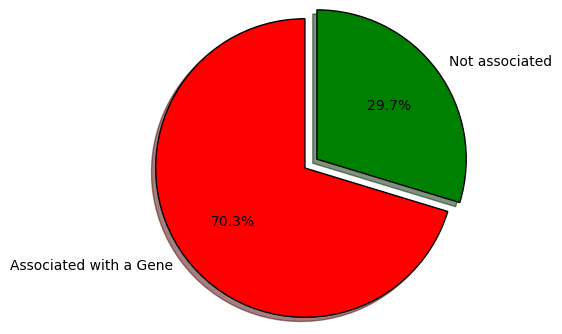

In [35]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Associated with a Gene', 'Not associated'
sizes = [703, 297]
explode = (0.0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', colors=['r','g'],
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [38]:
for gene in importantGenesUniqueList:
    if "SET" in gene:
        print(gene)
import math
relatedCpgs = set()
for cpg in list(importantCpgs.dropna(subset=['UCSC_RefGene_Name']).index):
    genes = importantCpgs.loc[cpg,'UCSC_RefGene_Name'].split(";")
    for gene in genes:
        if "PRDM8" in gene:
            relatedCpgs.add(importantCpgs.loc[cpg,'IlmnID'])
            
print(list(relatedCpgs))

['cg06307913', 'cg18073471', 'cg11388320', 'cg26299084', 'cg04214966', 'cg27242132']


In [27]:
cpgInfo[cpgInfo["IlmnID"]=="cg03795574"]['UCSC_RefGene_Name']

368064    IGF1R
Name: UCSC_RefGene_Name, dtype: object

In [13]:
import numpy as np
groupings = importantCpgs.dropna(axis=0,subset=["UCSC_RefGene_Group"])["UCSC_RefGene_Group"]
groupingSets = [group.split(";") for group in list(groupings)]
groupDict = {}
for groupingSet in groupingSets:
    tempSet = set(groupingSet)
    for g in tempSet:
        if g not in groupDict:
            groupDict[g] = 0
        groupDict[g] += 1

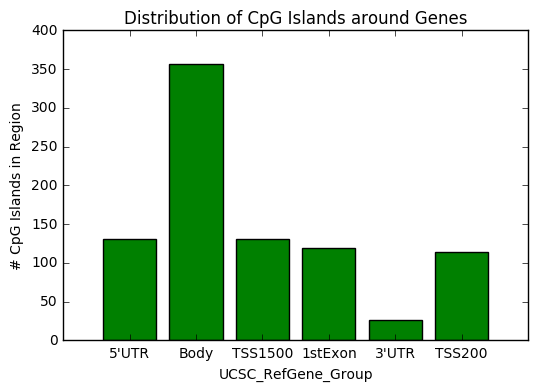

In [37]:
groupDict
D = groupDict

plt.bar(range(len(D)), list(D.values()), align='center',color="g")
plt.xticks(range(len(D)), list(D.keys()))
# # for python 2.x:
# plt.bar(range(len(D)), D.values(), align='center')  # python 2.x
# plt.xticks(range(len(D)), D.keys())  # in python 2.x
plt.xticks(range(len(D)), list(D.keys()))
plt.ylabel("# CpG Islands in Region")
plt.xlabel("UCSC_RefGene_Group")
plt.title("Distribution of CpG Islands around Genes")
plt.show()